Write stuff about the purpose of the notebook

In [1]:
# Import libraries used below

from pymongo import MongoClient
from pymongo import collection
import pandas as pd
import matplotlib as plt
%matplotlib inline

What are the fields/schema

In [ ]:
# Specifiy arguments, via assignment to variables

In [2]:
# Connect to the db

c = MongoClient()

In [15]:
#Query

result = pd.DataFrame(list(c.big_hack.query.find({"length":{"$gte":1000}})))#, projection=['meta__center'])))
result.drop(columns = ['_id','meta__accession','meta__contig','sample__accession','sample__contig'],inplace=True)
result.columns = [x.split('__')[1] if '__' in x else x for x in result.columns]
result

accession                contig  covered_length  length bio_project  \
0       ERR011268     Contig_13_203.952            2040    2040   PRJEB4336   
1       ERR011306   Contig_2859_44.9602            1451    1451   PRJEB2054   
2       ERR011265    Contig_896_23.1325            1160    1160   PRJEB4336   
3       DRR014161  Contig_13545_35.8123          134631  134631  PRJDA72415   
4       DRR014161  Contig_12879_44.0672           40568   40568  PRJDA72415   
5       DRR014178  Contig_14799_31.1835          123206  123206  PRJDA72415   
6       DRR014150   Contig_6937_45.8821            2989    2989  PRJDA72415   
7       DRR003644  Contig_33936_33.8241           14907   14907  PRJDA72415   
8       DRR003626  Contig_25075_77.6763           12938   12938  PRJDA72415   
9       DRR003622  Contig_72287_76.1631           14059   14059  PRJDA72415   
10      DRR003622  Contig_72287_76.1631           14059   14059  PRJDA72415   
11      DRR003622  Contig_72287_76.1631           14059   14059  PRJDA72415   
12      DRR003637    Contig_8498_32.729           27441   27441  PRJDA72415   
13      DRR003637  Contig_26579_25.0816           41630   41630  PRJDA72415   
14      DRR003621  Contig_26205_73.3384            2317    2331  PRJDA72415   
15      DRR014187  Contig_37674_47.6002            1038    1038   PRJDB2568   
16      DRR027586           NC_001479.1             195    7835   PRJEB2054   
17      DRR027592           NC_001479.1             193    7835   PRJEB2054   
18      DRR042452  Contig_46896_29.1962            1228    1228   PRJDB3601   
19      DRR042272   Contig_4792_36.6649            1712    1712   PRJDB3601   
20      DRR042288  Contig_44651_39.3663            1893    1893   PRJDB3601   
21      DRR042289  Contig_14267_61.2462            1259    1259   PRJDB3601   
22      DRR042304  Contig_72101_47.6001           15324   15324   PRJDB3601   
23      DRR042364  Contig_63843_45.3796           91533   91533   PRJDB3601   
24      DRR042364  Contig_63843_45.3796           91533   91533   PRJDB3601   
25      DRR042398  Contig_66605_66.1486           88878   88878   PRJDB3601   
26      DRR042399  Contig_92108_49.4056            3859    3859   PRJDB3601   
27      DRR042399  Contig_92108_49.4056            3859    3859   PRJDB3601   
28      DRR042402  Contig_44663_83.1082          114954  114954   PRJDB3601   
29      DRR053209           NC_001479.1             191    7835   PRJEB2054   
...           ...                   ...             ...     ...         ...   
22177  SRR4451534         NC_019445.1_3           15349   15349  PRJEB12124   
22178  SRR4451656         NC_019445.1_3           15349   15349  PRJEB12124   
22179  SRR4451531         NC_019445.1_3           15349   15349  PRJEB12124   
22180  SRR4451629         NC_019445.1_3           15349   15349  PRJEB12124   
22181  SRR4451634         NC_019445.1_3           15349   15349  PRJEB12124   
22182  SRR4451626         NC_019445.1_3           15349   15349  PRJEB12124   
22183  SRR4451627         NC_019445.1_3           15349   15349  PRJEB12124   
22184  SRR4451653         NC_019445.1_3           15349   15349  PRJEB12124   
22185  SRR4481749         NC_019445.1_3           15349   15349  PRJEB12124   
22186  SRR4481753         NC_019445.1_3           15349   15349  PRJEB12124   
22187  SRR4481754         NC_019445.1_3           15349   15349  PRJEB12124   
22188  SRR4481697         NC_019445.1_3           15349   15349  PRJEB12124   
22189  SRR4481698         NC_019445.1_3           15349   15349  PRJEB12124   
22190  SRR4481701         NC_019445.1_3           15349   15349  PRJEB12124   
22191  SRR4481685         NC_019445.1_3           15349   15349  PRJEB12124   
22192  SRR4481792         NC_019445.1_3           15349   15349  PRJEB12124   
22193  SRR4481798         NC_019445.1_3           15349   15349  PRJEB12124   
22194  SRR4481695         NC_019445.1_3           15349   15349  PRJEB12124   
22195  SRR4481696         NC_019445.1_3           15349   

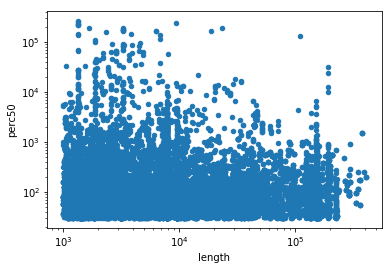

In [8]:
result.plot.scatter('length','perc50',logx=True,logy=True)

In [27]:
import plotly.graph_objs as go
import plotly

plotly.offline.init_notebook_mode(connected=True)

trace1 = go.Scatter(
    x = result['length'].values,
    y = result['perc50'].values,
    mode='markers',
    marker=dict(
        size=4,
        color = result['bitscore'].values,
        autocolorscale=True,
        showscale=True,
        colorbar = dict(
            title='bitscore'
        )
    ),
    text = [x for x in map('<br>'.join, zip(result['accession'].values, result['contig'].values))]
)
data = [trace1]
layout = go.Layout(
    xaxis=dict(
        title='Contig Lenght (bp)',
        type='log',
        autorange=True
    ),
    yaxis=dict(
        title='Average Coverage',
        type='log',
        autorange=True
    ),
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='Species_Neighbor_vs_RS_Length')